<a href="https://colab.research.google.com/github/HagarSameh/-breast-cancer-dataset/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score , adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv("GSE183947_fpkm.csv")

In [ ]:
print(dataset)

**Transpose**

In [ ]:
dataset= dataset.T

**Dropping**

In [ ]:
#here i removed the rows(which now are columns after transpose) that carry more than 40 zero value 
l=dataset.columns.tolist()
for x in l:
  if len(dataset[dataset[x]== 0]) >= 40   :
    dataset.drop(x,axis=1,inplace=True)
    print("column ",x,"dropped")



**Transpose Again**

In [ ]:
dataset = dataset.T

In [ ]:
dataset=dataset.iloc[:, dataset.columns != 'Unnamed: 0'] # to get all numbers for scaling except first column

In [ ]:
dataset

,CA.102548,CA.104338,CA.105094,CA.109745,CA.1906415,CA.1912627,CA.1924346,CA.1926760,CA.1927842,CA.1933414,...,CAP.2040686,CAP.2046297,CAP.2046641,CAP.348981,CAP.354300,CAP.359448,CAP.94377,CAP.98389,CAP.98475,CAP.99145
0,0.93,1.97,0.0,5.45,4.52,4.75,3.96,3.58,6.41,11.89,...,6.66,8.35,8.94,6.33,5.94,6.35,3.74,4.84,10.46,4.54
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23,0.39,0.44,...,0.12,0.17,1.08,0.29,0.0,0.07,9.19,1.18,0.09,0.39
2,0.0,0.43,0.0,3.43,8.45,8.53,7.8,7.62,6.4,6.09,...,4.93,7.47,5.72,4.96,9.28,9.15,4.77,3.75,7.31,2.77
3,5.78,5.17,8.76,4.58,7.2,6.03,9.05,5.37,5.92,12.45,...,8.02,6.0,5.28,4.98,4.45,7.0,4.14,5.51,7.45,2.33
4,2.83,6.26,3.37,6.24,5.16,13.69,6.69,5.28,7.65,13.71,...,7.91,4.61,8.35,9.84,7.68,5.62,2.81,7.08,7.28,5.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20238,0.0,0.1,0.0,1.15,0.0,0.12,0.46,0.1,0.24,0.0,...,0.21,0.19,0.08,0.17,2.52,1.64,0.5,0.0,0.0,1.17
20240,38.27,30.99,47.57,12.27,4.69,3.88,2.96,6.4,5.63,6.88,...,3.56,2.95,3.3,4.53,2.89,3.11,3.03,9.18,5.2,5.27
20241,0.0,0.16,0.0,0.0,0.0,0.3,0.0,0.0,0.43,0.55,...,0.19,0.72,0.95,0.0,0.33,0.26,0.0,0.0,0.0,0.23
20244,0.0,0.0,0.0,0.1,0.64,0.0,0.0,0.0,0.2,0.27,...,0.46,0.19,0.7,0.16,0.84,0.58,0.0,0.0,0.0,0.14


**Elobw Method**

In [ ]:
wcss = [] 
k=[]
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset) 
    wcss.append(kmeans.inertia_)
    k.append(i)

Text(0, 0.5, 'error rate')

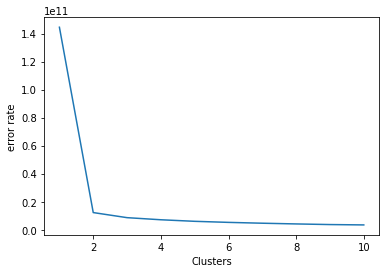

In [ ]:
plt.plot( k,wcss, label = "error line")
plt.xlabel('Clusters')
plt.ylabel('error rate')

**Dimension Reduction  /**
**Scalling /**
**Kmeans**

In [ ]:
preprocessor=Pipeline(
    [
        ("scaler",MinMaxScaler()),
        ("pca" ,PCA(n_components=2,random_state=42)),
    ]
)

clusterer=Pipeline(
    [
        ("kmeans",
         KMeans(n_clusters=2,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42)
         )
    ]
)

pipe=Pipeline(
    [
        ("preprocessor",preprocessor),
        ("Clusterer",clusterer),
    ]
    )

In [ ]:
pipe.fit(dataset)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('Clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=2, n_init=50,
                                         random_state=42))]))])

**Evaluation**

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(dataset)
predicted_labels = pipe["Clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data,predicted_labels)

0.9978195887425547

**Kmeans Plotting**

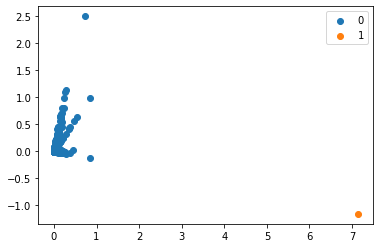

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Getting unique labels
u_labels = np.unique(predicted_labels)

#plotting the results:
for i in u_labels:
    plt.scatter(preprocessed_data[predicted_labels == i , 0] , preprocessed_data[predicted_labels == i , 1] , label = i)
plt.legend()
plt.show()

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
db = DBSCAN(eps=0.09, min_samples=3, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=3).fit(preprocessed_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 11


**DBscan Evaluation**

In [ ]:
silhouette_score(dataset,labels)

0.9642220162147362

**DBscan Plotting**

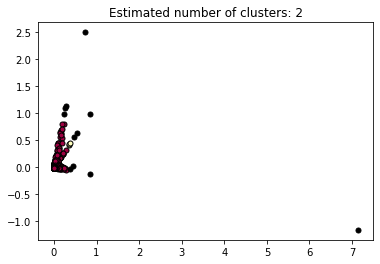

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = preprocessed_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],'o', markerfacecolor=tuple(col),markeredgecolor="k",markersize=5,)
    xy = preprocessed_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],  "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=5, )
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()
